# Lab: Linear Regression

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
marketing_df = pd.read_csv('marketing_customer_analysis_clean.csv', index_col=['unnamed:_0'])

In [45]:
marketing_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
unnamed:_0,,,,,,,,,,,,,,,,,,,,,
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [4]:
marketing_df.rename(columns=lambda name:name.lower().replace(' ','_'), inplace=True)
marketing_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type', 'month'],
      dtype='object')

In [5]:
marketing_numerical = marketing_df.select_dtypes(include='number')
marketing_categorical = marketing_df.select_dtypes(include='object')

In [6]:
# From previous lab
marketing_nominal = pd.get_dummies(marketing_categorical[['state','employmentstatus','gender','location_code',
                                                          'marital_status','policy_type','policy','sales_channel']],
                                   dtype=int)
marketing_nominal

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
unnamed:_0,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
10906,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ord_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder()

In [8]:
marketing_ordinal = marketing_df[['response', 'coverage', 'education', 'renew_offer_type', 'vehicle_size', 'vehicle_class']]
marketing_ordinal

,response,coverage,education,renew_offer_type,vehicle_size,vehicle_class
unnamed:_0,,,,,,
0,No,Basic,College,Offer3,Medsize,Four-Door Car
1,No,Basic,College,Offer4,Medsize,Four-Door Car
2,No,Basic,Bachelor,Offer3,Medsize,SUV
3,Yes,Extended,College,Offer2,Medsize,Four-Door Car
4,No,Premium,Bachelor,Offer1,Medsize,Four-Door Car
...,...,...,...,...,...,...
10905,No,Premium,Bachelor,Offer3,Medsize,Luxury Car
10906,No,Basic,College,Offer2,Medsize,Four-Door Car
10907,No,Extended,Bachelor,Offer1,Medsize,Luxury SUV


In [9]:
marketing_ordinal['response'] = ord_encoder.fit_transform(marketing_categorical[['response']])
marketing_ordinal.head()

/var/folders/tt/zhpd83790c19bgcn3bmmj4600000gn/T/ipykernel_59583/2282198459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_ordinal['response'] = ord_encoder.fit_transform(marketing_categorical[['response']])


,response,coverage,education,renew_offer_type,vehicle_size,vehicle_class
unnamed:_0,,,,,,
0,0.0,Basic,College,Offer3,Medsize,Four-Door Car
1,0.0,Basic,College,Offer4,Medsize,Four-Door Car
2,0.0,Basic,Bachelor,Offer3,Medsize,SUV
3,1.0,Extended,College,Offer2,Medsize,Four-Door Car
4,0.0,Premium,Bachelor,Offer1,Medsize,Four-Door Car


In [ ]:
# ordinal data to encode: response, coverage, education, renew_offer_type, vehicle_size, vehicle_class
#coverage_ordinal_map = {'Basic':0, 'Extended':1, 'Premium':2}
#ducation_ordinal_map = {'College':1, 'Bachelor':2, 'High School or Below':0, 'Doctor':4, 'Master':3}
#renewoffer_ordinal_map = {'Offer3':2, 'Offer4':3, 'Offer2':1, 'Offer1':0}
#vehiclesize_ordinal_map = {'Medsize':1, 'Small':0, 'Large':2}
#vehicleclass_ordinal_map = {'Four-Door Car':1, 'SUV':2, 'Two-Door Car':0, 'Sports Car':5, 'Luxury Car':3,'Luxury SUV':4}

In [ ]:
#marketing_ordinal['coverage'] = marketing_ordinal['coverage'].map(coverage_ordinal_map)
#marketing_ordinal['education'] = marketing_ordinal['education'].map(education_ordinal_map)
#marketing_ordinal['renew_offer_type'] = marketing_ordinal['renew_offer_type'].map(renewoffer_ordinal_map)
#marketing_ordinal['vehicle_size'] = marketing_ordinal['vehicle_size'].map(vehiclesize_ordinal_map)
#marketing_ordinal['vehicle_class'] = marketing_ordinal['vehicle_class'].map(vehicleclass_ordinal_map)

In [10]:
# try using ordinalencoder from sklearn
coverage_ordinal = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])
coverage_ordinal.fit_transform(marketing_ordinal[["coverage"]])

education_ordinal = OrdinalEncoder(categories=[['High School or Below','College','Bachelor','Master','Doctor']])
education_ordinal.fit_transform(marketing_ordinal[['education']])

array([[1.],
       [1.],
       [2.],
       ...,
       [2.],
       [1.],
       [2.]])

In [ ]:
# join the two categorical dfs into one

# marketing_categorical = pd.concat([marketing_ordinal, marketing_nominal], axis=1)
# marketing_categorical

In [ ]:
# join categorical with numerical
# marketing_transformed = pd.concat([marketing_categorical, marketing_numerical], axis=1)
# marketing_transformed

# customer and effective_to_date columns not included

## MinMaxScaler

In [ ]:
#from sklearn.preprocessing import MinMaxScaler # camel case denotes a class!

In [ ]:
#mmscaler = MinMaxScaler()

In [ ]:
#sns.histplot(marketing_df.customer_lifetime_value)

## StandardScaler

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#sscaler = StandardScaler()

In [ ]:
#marketing_df['customer_lifetime_value'].hist()

## PowerTransformer

In [ ]:
#from sklearn.preprocessing import PowerTransformer

In [ ]:
#pt = PowerTransformer()

In [ ]:
# get_dummies ()is an existing method in pandas, for nominal categorical
#pd.get_dummies(categoricals_tips[['sex','smoker']],dtype=int) # add dtype=int to see 1/0 instead of True/False

# Lab

## Linear Regression

### X-y split
(y is the target variable, in this case, "total claim amount")

In [11]:
marketing_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
unnamed:_0,,,,,,,,,
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2


In [12]:
marketing_numerical = marketing_numerical.dropna()
marketing_numerical = marketing_numerical.drop_duplicates()

In [62]:
import matplotlib.pyplot as plt 

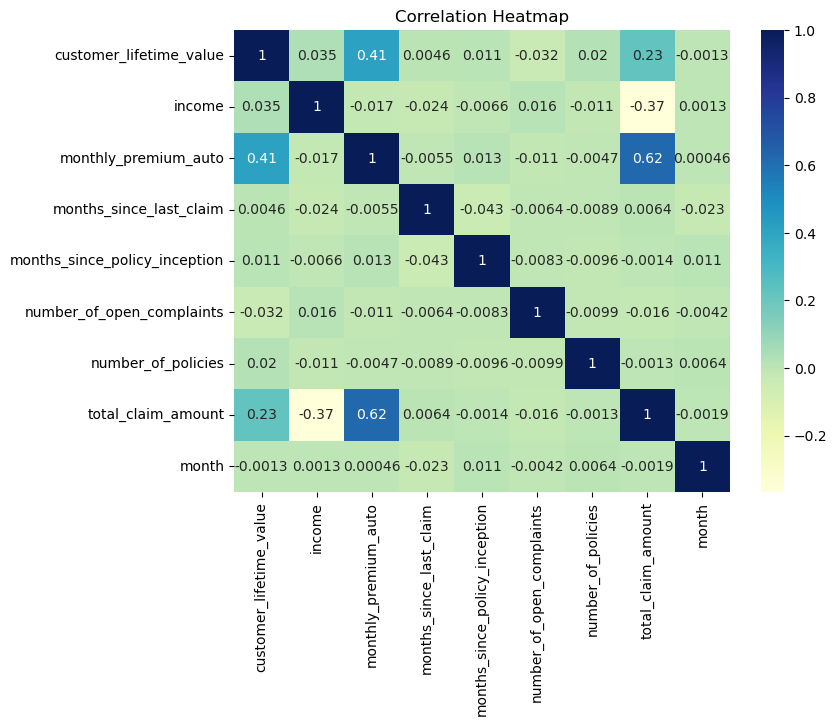

In [70]:
# testing out a correlation heat map
corr_matrix = marketing_numerical.corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = marketing_numerical[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim',
                         'months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y = marketing_numerical[['total_claim_amount']]

### Train-test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [16]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
unnamed:_0,,,,,,,
704,11533.477220,41098,96,3.000000,15,0.000000,2
446,2926.522300,23656,80,11.000000,1,3.000000,1
4826,2921.490461,62018,73,2.000000,59,0.000000,1
3540,3288.657500,0,97,15.149071,17,0.384256,1
1601,9902.392683,0,133,4.000000,58,0.000000,8
...,...,...,...,...,...,...,...
6923,2786.661219,94310,70,1.000000,76,4.000000,1
6184,14590.245830,46244,62,8.000000,3,0.000000,2
6450,9621.726190,54872,121,9.000000,50,0.000000,3


### Standardize the data

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>,
        <Axes: title={'center': 'months_since_last_claim'}>],
       [<Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>,
        <Axes: title={'center': 'number_of_policies'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

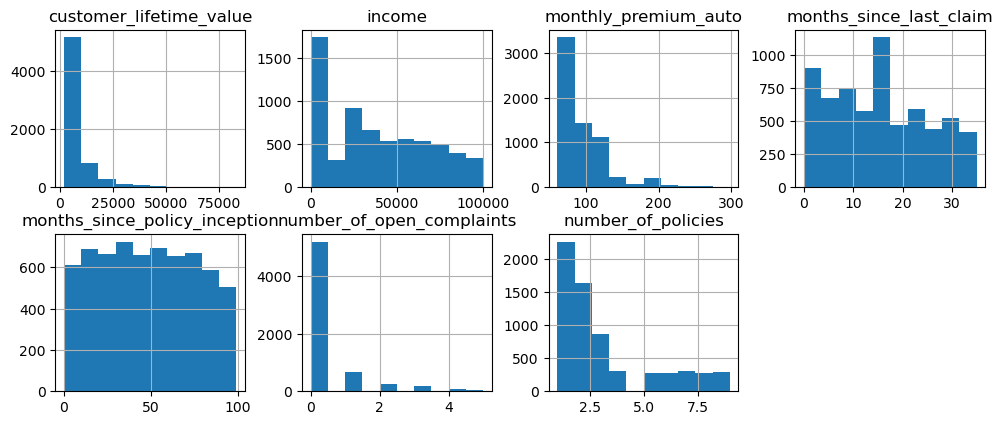

In [18]:
X_train.hist(bins=10, figsize=(12,10), layout=(4,4), sharex=False)
# consider MinMaxScaler for a wide range,
# consider StandardScaler for a skewed, but still bell-shaped distribution
# consider PowerTransformer skewed, non-normal distribution
# ideally apply the same scaler/transformer to all inputs

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>,
        <Axes: title={'center': 'months_since_last_claim'}>],
       [<Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>,
        <Axes: title={'center': 'number_of_policies'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

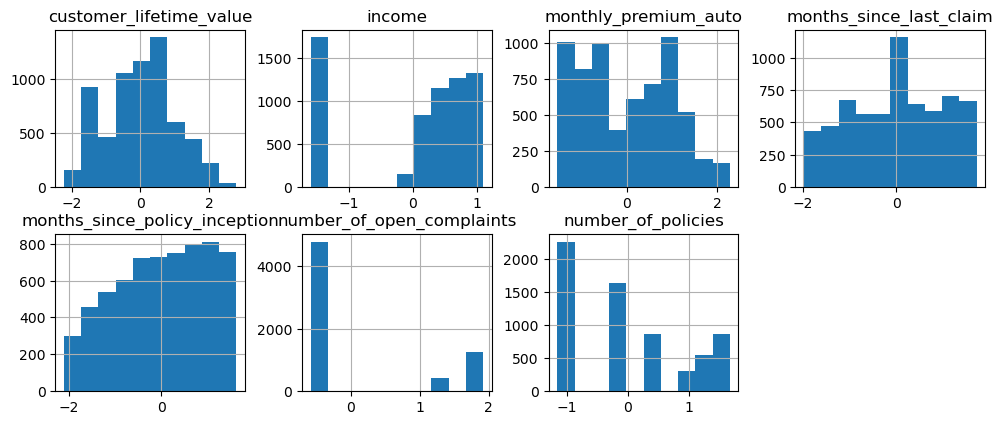

In [40]:
# apply PowerTransformer to X_train
pt_X = PowerTransformer()

# first fit the PowerTransformer to my X_train data, i.e. calibrating my machine
X_train_fit = pt_X.fit(X_train) # first fit needs to be saved into a variable to then apply tranform onto it

# then transform X_train using the fitted transformer, i.e. applying my machine
X_train_trans = X_train_fit.transform(X_train)

X_train = pd.DataFrame(X_train_trans)
X_train.columns = X.columns
X_train.hist(bins=10, figsize=(12,10), layout=(4,4), sharex=False)

In [36]:
# transform the test data with the same PowerTransformer
X_test_scaled = X_train_fit.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)
X_test.columns = X.columns
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.266750,0.185894,0.248676,0.906903,-0.920790,-0.587298,0.507668
1,0.142545,0.543491,-0.162985,1.141833,1.065015,-0.587298,1.675384
2,0.568223,0.673893,-0.705589,-0.076654,-0.963947,-0.587298,-0.073873
3,-0.139145,0.944778,1.365574,0.826068,0.161242,-0.587298,-1.157640
4,-0.314707,-1.591806,-1.086631,-1.172572,-0.554947,-0.587298,1.130246
...,...,...,...,...,...,...,...
2147,0.670096,0.531529,1.013303,-0.396154,1.035675,-0.587298,0.507668
2148,-1.294773,-1.591806,0.504789,-1.023816,-1.602880,1.916902,-1.157640
2149,0.468681,0.797336,-1.004858,-1.172572,-1.237309,-0.587298,-0.073873
2150,-1.472797,0.320967,-0.926008,-1.513146,0.025854,-0.587298,-1.157640


In [ ]:
# X_train.columns = ['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception',
#                   'number_of_open_complaints', 'number_of_policies']

In [ ]:
# X_train['customer_lifetime_value'] = pt.fit_transform(X_train[['customer_lifetime_value']])
# X_train['income'] = pt.fit_transform(X_train[['income']])
# X_train['monthly_premium_auto'] = pt.fit_transform(X_train[['monthly_premium_auto']])
# X_train['months_since_last_claim'] = pt.fit_transform(X_train[['months_since_last_claim']])
# X_train['months_since_policy_inception'] = pt.fit_transform(X_train[['months_since_policy_inception']])
# X_train['number_of_open_complaints'] = pt.fit_transform(X_train[['number_of_open_complaints']])
# X_train['number_of_policies'] = pt.fit_transform(X_train[['number_of_policies']])

# Apply Transformer to the entire DF, so that it remembers everything it originally fitted
# if applied to individual columns, the transformer only remembers fitting the last column

### Apply linear regression
i.e. train the model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
# find the line of best fit, i.e. the intercept and slope of our regression line
lm = LinearRegression()
model = lm.fit(X_train,y_train) 

In [43]:
model.coef_

array([[   4.74127892, -110.62833828,  156.59477655,    5.56883662,
          -2.64436725,   -2.61944966,   -5.06352689]])

In [44]:
model.intercept_

array([434.18236482])

### Model Interpretation

In [46]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.266750,0.185894,0.248676,0.906903,-0.920790,-0.587298,0.507668
1,0.142545,0.543491,-0.162985,1.141833,1.065015,-0.587298,1.675384
2,0.568223,0.673893,-0.705589,-0.076654,-0.963947,-0.587298,-0.073873
3,-0.139145,0.944778,1.365574,0.826068,0.161242,-0.587298,-1.157640
4,-0.314707,-1.591806,-1.086631,-1.172572,-0.554947,-0.587298,1.130246
...,...,...,...,...,...,...,...
2147,0.670096,0.531529,1.013303,-0.396154,1.035675,-0.587298,0.507668
2148,-1.294773,-1.591806,0.504789,-1.023816,-1.602880,1.916902,-1.157640
2149,0.468681,0.797336,-1.004858,-1.172572,-1.237309,-0.587298,-0.073873
2150,-1.472797,0.320967,-0.926008,-1.513146,0.025854,-0.587298,-1.157640


In [47]:
y_test

,total_claim_amount
unnamed:_0,
465,427.200000
9308,384.000000
9122,340.800000
10749,420.434259
5021,420.393440
...,...
669,660.136987
1458,691.200000
7515,277.685667


In [48]:
# look at a random customer
random_customer = X_test.sample()
random_customer

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
953,0.646303,0.46151,1.034495,-0.629344,-0.836168,-0.587298,1.580408


In [49]:
model.predict(random_customer)

array([[540.42944468]])

In [50]:
# Create y_pred
y_pred = model.predict(X_test) 
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['y_pred']
y_pred

,y_pred
0,460.276395
1,345.807518
2,255.867954
3,554.419090
4,429.381364
...,...
2147,531.258325
2148,682.567287
2149,189.495450
2150,245.588670


In [51]:
y_test = y_test.reset_index(drop=True)
y_test.columns = ['y_test']
y_test

,y_test
0,427.200000
1,384.000000
2,340.800000
3,420.434259
4,420.393440
...,...
2147,660.136987
2148,691.200000
2149,277.685667
2150,448.181396


In [52]:
# prepare residuals df by joining y_test and y_pred and resetting the column names
residuals_df = pd.concat([y_test,y_pred],axis=1)
residuals_df 

,y_test,y_pred
0,427.200000,460.276395
1,384.000000,345.807518
2,340.800000,255.867954
3,420.434259,554.419090
4,420.393440,429.381364
...,...,...
2147,660.136987,531.258325
2148,691.200000,682.567287
2149,277.685667,189.495450
2150,448.181396,245.588670


In [53]:
# add column to calculate residuals
residuals_df['residual'] = residuals_df['y_test']-residuals_df['y_pred']
residuals_df

,y_test,y_pred,residual
0,427.200000,460.276395,-33.076395
1,384.000000,345.807518,38.192482
2,340.800000,255.867954,84.932046
3,420.434259,554.419090,-133.984831
4,420.393440,429.381364,-8.987924
...,...,...,...
2147,660.136987,531.258325,128.878662
2148,691.200000,682.567287,8.632713
2149,277.685667,189.495450,88.190217
2150,448.181396,245.588670,202.592726


In [54]:
# calculating error metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [55]:
mean_error = residuals_df.residual.mean()
mean_error

-0.6708258123514048

In [56]:
mse(y_test,y_pred) # mean squared error

47956.78946061997

In [57]:
mae(y_test,y_pred) # mean absolute error

158.8137446079566

In [58]:
rmse = mse(y_test,y_pred,squared=False)
rmse # root mean squared error

218.9903866853976

### Lab - Wednesday
Compute R2 for the first model iteration + feature importance plot

In [77]:
from sklearn.metrics import r2_score

In [78]:
# calculating r2 for test data

r2_test = round(r2_score(y_test,y_pred),2)
r2_test

0.45

In [79]:
# calculating r2 for train data
# get predictions from y_train data

y_pred_train = pd.DataFrame(model.predict(X_train))
y_pred_train.columns = ['y_pred_train']
y_pred_train

#y_train_score = y_train.copy()
#y_train_score = y_train_score.reset_index(drop=True)
#y_train_score.columns = ['y_train_score']
#y_train_score

,y_pred_train
0,458.946258
1,383.709080
2,252.184308
3,695.877651
4,809.030532
...,...
6450,178.877474
6451,152.809017
6452,535.185838
6453,545.716198


In [88]:
error_train = pd.concat([y_train,y_pred_train],axis=1)
error_train.rename(columns={'total_claim_amount':'y_train'},inplace=True)
error_train.reset_index(drop=True, inplace=True)
error_train

,y_train,y_pred_train
0,250.058657,521.421689
1,384.000000,555.090186
2,90.094835,269.206315
3,1026.315988,253.764988
4,945.169882,666.864169
...,...,...
8844,NaN,151.447677
8845,NaN,595.297567
8846,NaN,185.145638
8847,NaN,377.109873


In [89]:
error_train['residual'] = error_train['y_train']-error_train['y_pred_train']
error_train

,y_train,y_pred_train,residual
0,250.058657,521.421689,-271.363032
1,384.000000,555.090186,-171.090186
2,90.094835,269.206315,-179.111480
3,1026.315988,253.764988,772.551000
4,945.169882,666.864169,278.305713
...,...,...,...
8844,NaN,151.447677,NaN
8845,NaN,595.297567,NaN
8846,NaN,185.145638,NaN
8847,NaN,377.109873,NaN


In [90]:
# calculate R2 of train data

r2_train = round(r2_score(y_train,y_pred_train),2)
r2_train

0.43

In [91]:
r2_test
# R2 score of test > R2 score of train, so we seem to be okay

0.45

### Check feature importance

In [92]:
feature_names = list(X_train.columns)
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]
fi_dict = {'name':feature_names,'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,customer_lifetime_value,4.741279
1,income,-110.628338
2,monthly_premium_auto,156.594777
3,months_since_last_claim,5.568837
4,months_since_policy_inception,-2.644367
5,number_of_open_complaints,-2.619450
6,number_of_policies,-5.063527


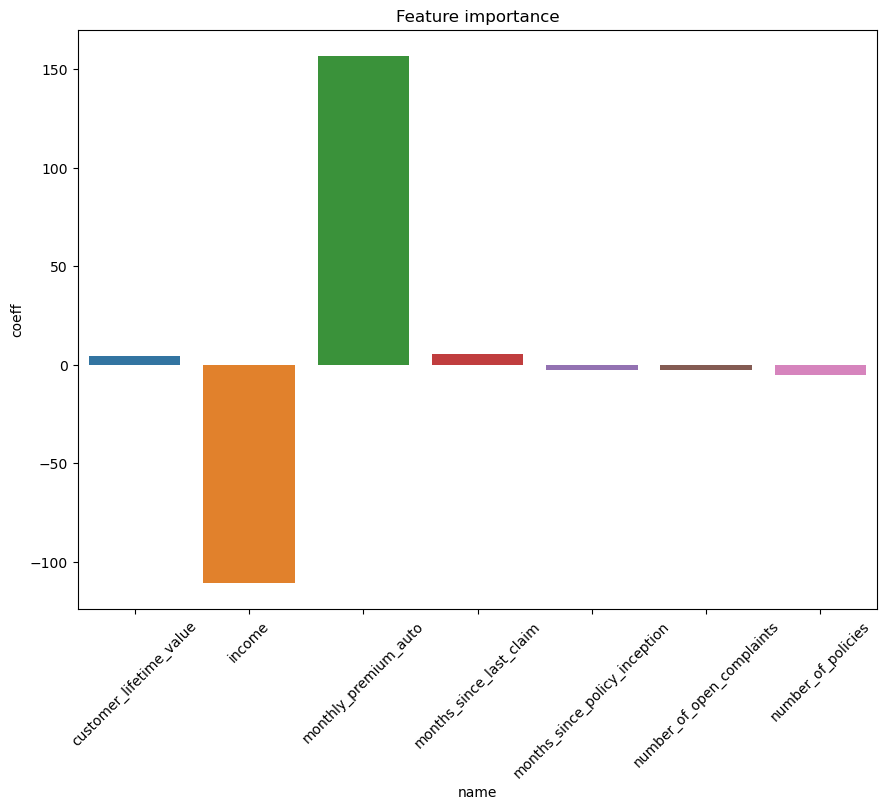

In [101]:
plt.figure(figsize=(9,8))
fi_plot = sns.barplot(x=fi_df['name'],y=fi_df['coeff'])
fi_plot.set_xticklabels(fi_plot.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.title('Feature importance')
plt.show()